<center><h1>Indra Rusyadi Adiwijaya<br/>20921001<br/>PROGRESS PENELITIAN<br/>INTEGRASI METODE HYBRID ALGORITMA DECISION SUPPORT SYSTEM DAN MACHINE LEARNING PADA SELEKSI PENERIMA PENDANAAN HIBAH PEMERINTAH : STUDI KASUS PROGRAM PENDANAAN DESA BERINOVASI BRIN</h1><br/>SK6093 & SK6094 Independent Research in Computational Science 3 & 4<br/>LAPORAN AKHIR (26-27 April 2022)</center>

## Load dataset

Dataset yang digunakan adalah dataset yang berasal dari seleksi substansi calon penerima program insentif Desa Berinovasi BRIN Tahun 2021. Dimana data tersebut kalkulasi hasil penilaian oleh tim reviewer kepada calon penerima program berdasarkan 9 kriteria yang dinilai. Adapun Informasi kriteria dan tiap kolom yang akan digunakan sebagai berikut:

__Informasi Atribut pada Data Tersebut :__

1. __No Pengusulan__ : ID Pengusul Proposal
2. __K1 (Kriteria Profil Lokus)__ : 
3. __K2 (Kriteria Profil Produk Unggulan Daerah)__ : 
4. __K3 (Kriteria Profil Teknologi dan Inovasi)__ : 
5. __K4 (Kriteria Dukungan Pemangku Kepentingan/Stakeholders)__ : 
6. __K5 (Kriteria Sumber Daya Manusia)__ : 
6. __K6 (Kriteria Lembaga Pengelola)__ : 
6. __K7 (Kriteria Metode Pelaksanaan Kegiatan)__ : 
6. __K8 (Kriteria Rencana Kerja dan Strategi Implementasi)__ : 
6. __K9 (Kriteria Rincian Anggaran Biaya)__ : 
6. __Nilai Rata-Rata__ : 
6. __Status__ : 
6. __Dampak Ekonomi__ :
6. __Dampak Sosial__ :

In [131]:
import seaborn as sns #Untuk memanggil data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.metrics import classification_report #Untuk mengukur pemodelan klasifikasi (F1 score, Sensitivity, Recall dsb) 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #Untuk mengukur baik tidaknya model yang digunakan 
from sklearn.model_selection import train_test_split #Split data training dan data test
from sklearn.linear_model import LogisticRegression #Menampung pemodelan regresi logistic
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

In [132]:
data = pd.read_csv("Data_AHP.csv")
#data= sns.load_dataset("tenant_bit")
data

,No,No Pengusulan,Judul Proposal,Lembaga Pengusul,Nama Kordinator,Email Kordinator,No Telp. Kordinator,Nilai Proposal,K1,K2,...,K4,K5,K6,K7,K8,K9,Total Nilai,Status,Dampak Ekonomi,Dampak Sosial
0,1,1.620000e+14,INOVASI PERBAIKAN KESUBURAN TANAH DAN PENGELOL...,YAYASAN PUSAT DATA � INFORMASI DAERAH RAWA & P...,"DR. Momon Sodik Imanudin, MSC",momon_unsri@yahoo.co.id,62-711-441610,"Rp.150.000.000,00",2.7,17.40,...,20.250,7.2,8.1,3.0,8.10,2.7,76.25,1,26818000.0,26.0
1,2,1.620000e+14,PROPOSAL BANTUAN PEMERINTAH BERUPA DESA BERINO...,Badan Usaha Milik Desa Rakat Mufakat,Khalikin nor,Khalikinnor@ymail.com,56112,"Rp.100.000.000,00",2.7,17.40,...,18.900,7.2,8.1,2.4,7.20,2.4,73.50,1,70000000.0,10.0
2,3,1.620000e+14,Pengelolaan Pasteurisasi susu sapi perah dan p...,Perkumpulan Kelompok Ternak Sapi Langgeng Mulyo,Winarto,syam.chungsil@gmail.com,83833384408,"Rp.30.850.000,00",2.4,17.40,...,18.900,7.2,8.1,2.7,7.65,2.4,73.55,1,NaN,20.0
3,4,1.620000e+13,Budidaya Tanaman Jahe,"Lembaga Pengkajian, Pemberdayaan dan Pengemban...","Musa, SE",musagrandresidence@gmail.com,85880747479,"Rp.200.000.000,00",2.7,20.88,...,20.250,8.1,8.1,2.7,7.65,3.0,80.58,1,NaN,19.0
4,5,1.620000e+14,Pemanfaatan Limbah Gambir untuk Zat Pewarna Pa...,KUD Ginde Sugi,Mirza Antoni,mirzasep@gmail.com,81278132976,"Rp.150.000.000,00",2.7,18.56,...,22.275,7.2,7.2,2.7,8.10,2.4,78.34,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,1.620000e+14,DESA BERINOVASI BERBASIS PRODUK UNGGULAN NANAS...,Kelompok Tani Taruna Bangsa,Rasmanto,rasmipaidhrp@gmail.com,82274364738,"Rp.199.820.000,00",1.8,22.04,...,14.850,6.3,6.3,1.8,5.85,2.1,66.64,0,NaN,NaN
92,93,1.620000e+14,Pengembangan Desa Berinovasi Melalui Penciptaa...,BUMDesa Sumber Rejo,"JUMINO, S.P.",joewindhandini@gmail.com,085865214428 / 082242938083,"Rp.200.000.000,00",2.4,20.30,...,16.875,7.2,8.1,2.4,8.10,2.4,71.78,0,NaN,NaN
93,94,1.620000e+14,Inovasi Penerapan Model Silvopasture Intensif ...,Koperasi Wanua Kudara Minasae,"Teguh Bimantara, S.Hut.",bimantara25.teguh@gmail.com,82194329225,"Rp.199.875.000,00",2.4,23.20,...,13.500,7.2,7.2,2.4,8.10,2.1,72.10,0,NaN,NaN
94,95,1.620000e+14,RUMAH PRODUKSI PAKAN TERNAK KOMPLIT FEED DARI ...,BUMDES MENTAWAK MANDIRI,Wahyu Syahfajar S. Pt,wahyusyahfajar@gmail.com,82213890593,"Rp.199.005.000,00",2.1,23.20,...,13.500,5.4,7.2,2.4,6.75,2.4,68.95,0,NaN,NaN


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   96 non-null     int64  
 1   No Pengusulan        96 non-null     float64
 2   Judul Proposal       96 non-null     object 
 3   Lembaga Pengusul     96 non-null     object 
 4   Nama Kordinator      96 non-null     object 
 5   Email Kordinator     96 non-null     object 
 6   No Telp. Kordinator  96 non-null     object 
 7   Nilai Proposal       96 non-null     object 
 8   K1                   96 non-null     float64
 9   K2                   96 non-null     float64
 10  K3                   96 non-null     float64
 11  K4                   96 non-null     float64
 12  K5                   96 non-null     float64
 13  K6                   96 non-null     float64
 14  K7                   96 non-null     float64
 15  K8                   96 non-null     float

In [134]:
data_seleksi=data[['K1','K2','K3','K4','K5','K6','K7','K8','K9','Total Nilai', 'Status', 'Dampak Ekonomi', 'Dampak Sosial']]
data_seleksi

,K1,K2,K3,K4,K5,K6,K7,K8,K9,Total Nilai,Status,Dampak Ekonomi,Dampak Sosial
0,2.7,17.40,6.8,20.250,7.2,8.1,3.0,8.10,2.7,76.25,1,26818000.0,26.0
1,2.7,17.40,7.2,18.900,7.2,8.1,2.4,7.20,2.4,73.50,1,70000000.0,10.0
2,2.4,17.40,6.8,18.900,7.2,8.1,2.7,7.65,2.4,73.55,1,NaN,20.0
3,2.7,20.88,7.2,20.250,8.1,8.1,2.7,7.65,3.0,80.58,1,NaN,19.0
4,2.7,18.56,7.2,22.275,7.2,7.2,2.7,8.10,2.4,78.34,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1.8,22.04,5.6,14.850,6.3,6.3,1.8,5.85,2.1,66.64,0,NaN,NaN
92,2.4,20.30,4.0,16.875,7.2,8.1,2.4,8.10,2.4,71.78,0,NaN,NaN
93,2.4,23.20,6.0,13.500,7.2,7.2,2.4,8.10,2.1,72.10,0,NaN,NaN
94,2.1,23.20,6.0,13.500,5.4,7.2,2.4,6.75,2.4,68.95,0,NaN,NaN


# Data Visualization

In [135]:
#Deskriptif Analisis
data_seleksi.describe()

,K1,K2,K3,K4,K5,K6,K7,K8,K9,Total Nilai,Status,Dampak Ekonomi,Dampak Sosial
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,3.000000e+01,60.000000
mean,2.506875,21.913125,6.520833,21.452344,6.792188,7.411875,2.503125,6.990000,2.426875,78.518437,0.833333,7.546103e+07,21.316667
std,0.360967,3.272550,0.804450,3.077232,1.225139,0.798815,0.256885,1.074671,0.247749,6.173021,0.374634,2.780568e+08,47.234177
min,1.500000,11.600000,4.000000,13.500000,0.000000,6.300000,1.800000,3.600000,1.800000,64.950000,0.000000,1.600000e+05,0.000000
25%,2.400000,20.300000,6.000000,20.250000,6.300000,6.750000,2.400000,6.637500,2.400000,74.485000,1.000000,8.187500e+06,4.750000
50%,2.400000,21.750000,6.400000,21.262500,6.750000,7.200000,2.400000,7.200000,2.400000,77.890000,1.000000,1.430000e+07,10.000000
75%,2.700000,23.200000,7.200000,23.625000,7.200000,8.100000,2.700000,7.650000,2.400000,81.772500,1.000000,3.658800e+07,22.000000
max,3.000000,29.000000,8.000000,27.000000,9.000000,9.000000,3.000000,9.000000,3.000000,97.600000,1.000000,1.542000e+09,356.000000


In [136]:
data_seleksi.isnull().any() # Mengecek missing values untuk tiap kolom

K1                False
K2                False
K3                False
K4                False
K5                False
K6                False
K7                False
K8                False
K9                False
Total Nilai       False
Status            False
Dampak Ekonomi     True
Dampak Sosial      True
dtype: bool

In [137]:
data_seleksi.isnull().sum() # Memeriksa jumlah missing values di tiap kolom

K1                 0
K2                 0
K3                 0
K4                 0
K5                 0
K6                 0
K7                 0
K8                 0
K9                 0
Total Nilai        0
Status             0
Dampak Ekonomi    66
Dampak Sosial     36
dtype: int64

In [138]:
#Membuat Data Berdasarkan Variabel Respon Status, Dampak Ekonomi dan Dampak Sosial
data_status=data[['K1','K2','K3','K4','K5','K6','K7','K8','K9','Status']]
data_ekonomi=data[['K1','K2','K3','K4','K5','K6','K7','K8','K9','Dampak Ekonomi']]
data_sosial=data[['K1','K2','K3','K4','K5','K6','K7','K8','K9','Dampak Sosial']]
data_status

,K1,K2,K3,K4,K5,K6,K7,K8,K9,Status
0,2.7,17.40,6.8,20.250,7.2,8.1,3.0,8.10,2.7,1
1,2.7,17.40,7.2,18.900,7.2,8.1,2.4,7.20,2.4,1
2,2.4,17.40,6.8,18.900,7.2,8.1,2.7,7.65,2.4,1
3,2.7,20.88,7.2,20.250,8.1,8.1,2.7,7.65,3.0,1
4,2.7,18.56,7.2,22.275,7.2,7.2,2.7,8.10,2.4,1
...,...,...,...,...,...,...,...,...,...,...
91,1.8,22.04,5.6,14.850,6.3,6.3,1.8,5.85,2.1,0
92,2.4,20.30,4.0,16.875,7.2,8.1,2.4,8.10,2.4,0
93,2.4,23.20,6.0,13.500,7.2,7.2,2.4,8.10,2.1,0
94,2.1,23.20,6.0,13.500,5.4,7.2,2.4,6.75,2.4,0


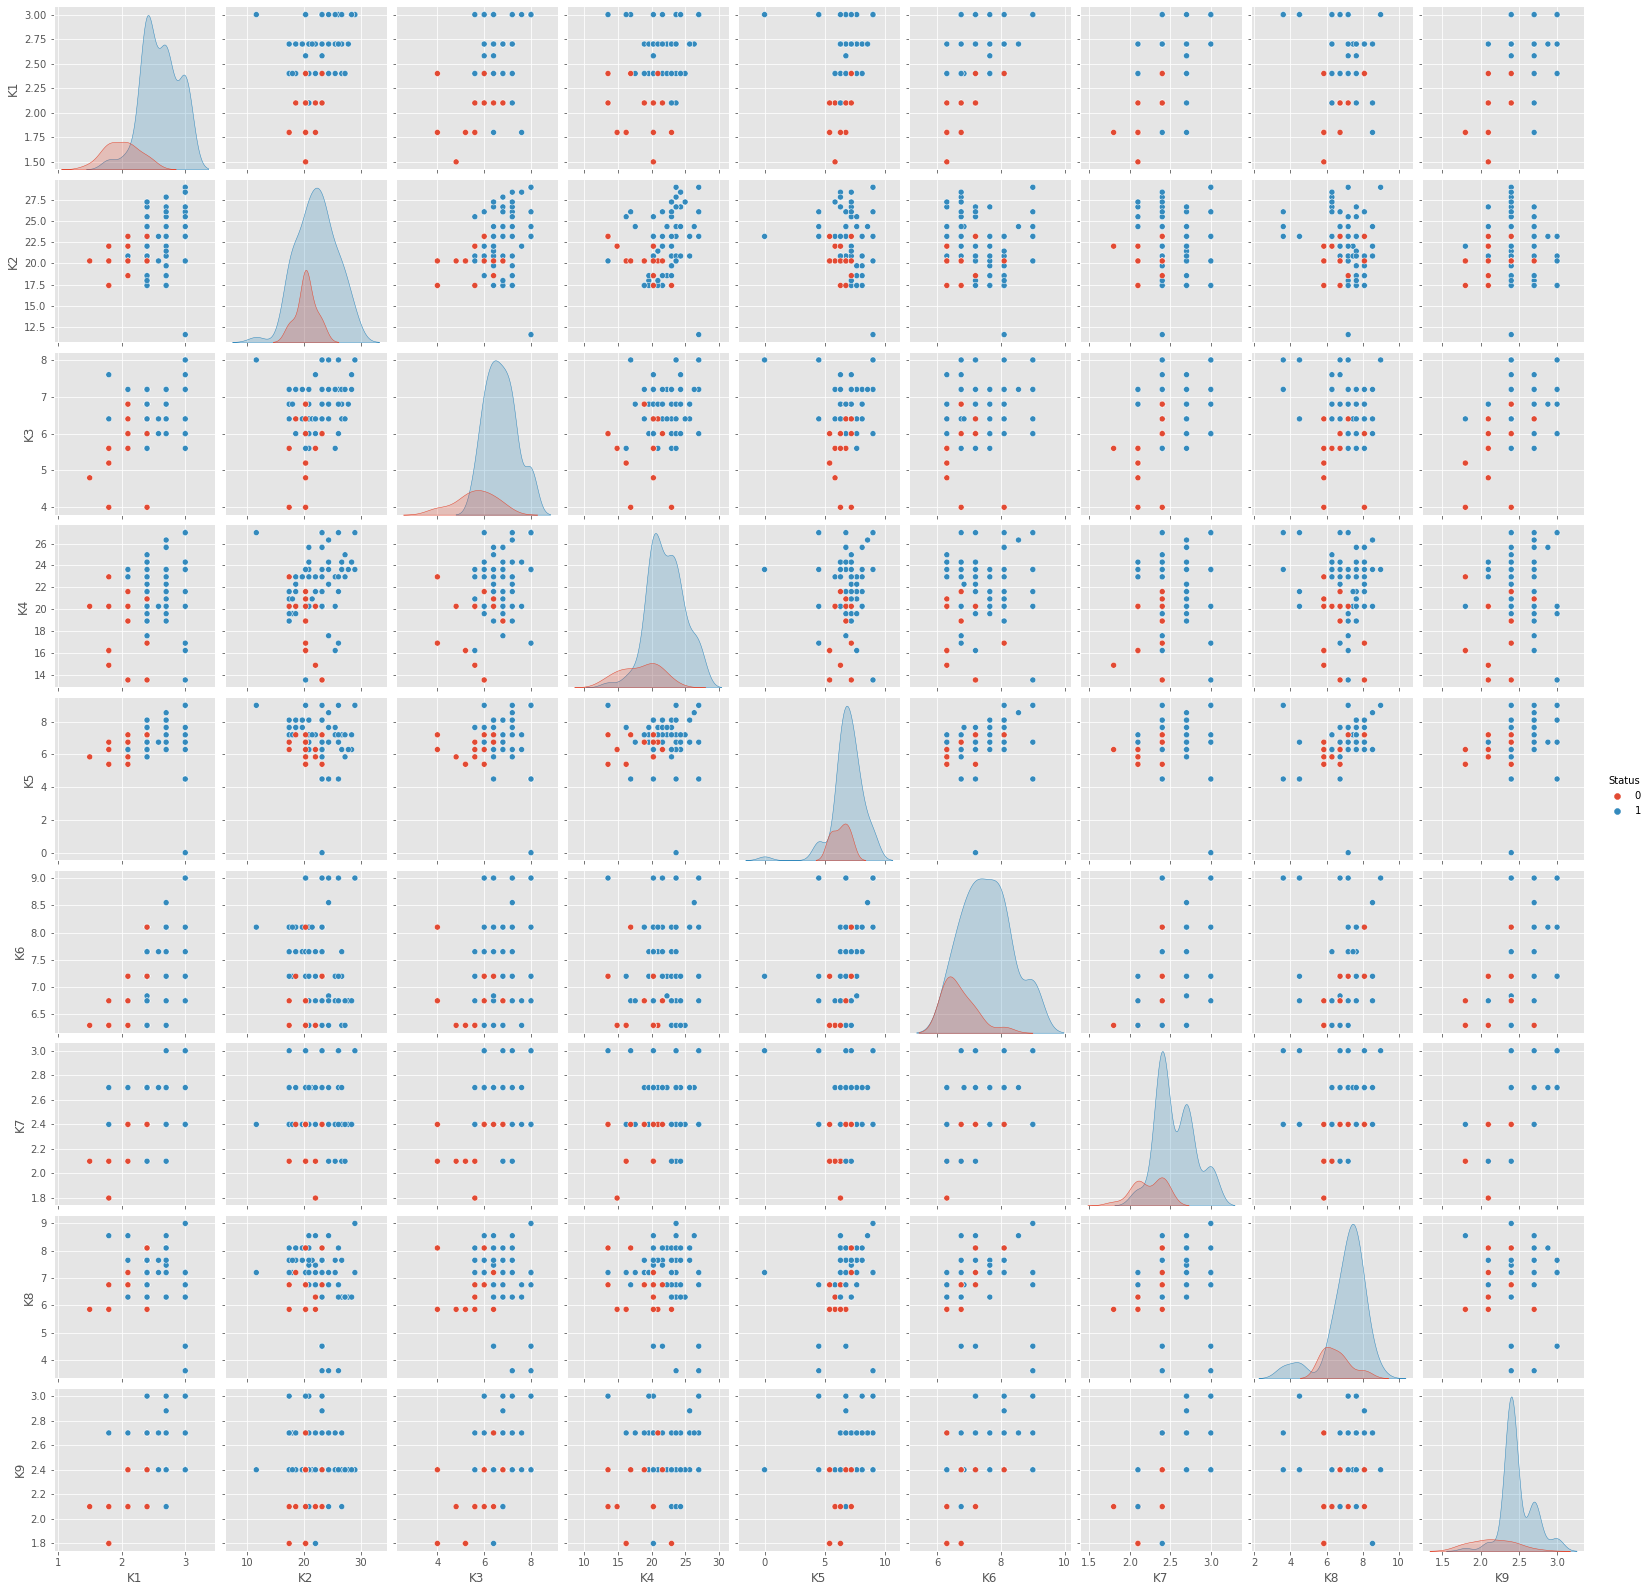

In [139]:
sns.pairplot(data_status, hue='Status')

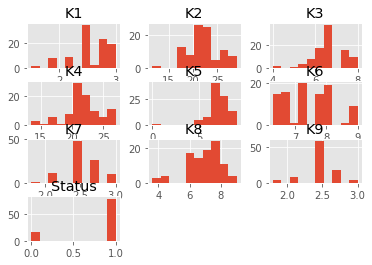

In [140]:
# Univariate Histograms
data_status.hist()
plt.show()

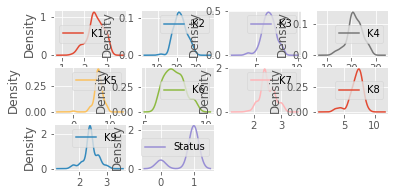

In [141]:
# Univariate Density Plots
#plt.figure(figsize=(12,8))
data_status.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
plt.show()

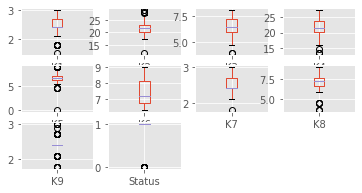

In [142]:
# Box and Whisker Plots
data_status.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

# Pemodelan Logistic Regression Tanpa Data Preparation

In [143]:
X = data_status[['K1','K2','K3','K4','K5','K6','K7', 'K8','K9']]
y=data_status['Status']
X

,K1,K2,K3,K4,K5,K6,K7,K8,K9
0,2.7,17.40,6.8,20.250,7.2,8.1,3.0,8.10,2.7
1,2.7,17.40,7.2,18.900,7.2,8.1,2.4,7.20,2.4
2,2.4,17.40,6.8,18.900,7.2,8.1,2.7,7.65,2.4
3,2.7,20.88,7.2,20.250,8.1,8.1,2.7,7.65,3.0
4,2.7,18.56,7.2,22.275,7.2,7.2,2.7,8.10,2.4
...,...,...,...,...,...,...,...,...,...
91,1.8,22.04,5.6,14.850,6.3,6.3,1.8,5.85,2.1
92,2.4,20.30,4.0,16.875,7.2,8.1,2.4,8.10,2.4
93,2.4,23.20,6.0,13.500,7.2,7.2,2.4,8.10,2.1
94,2.1,23.20,6.0,13.500,5.4,7.2,2.4,6.75,2.4


In [144]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [145]:
x_train1

,K1,K2,K3,K4,K5,K6,K7,K8,K9
43,2.58,23.20,6.4,20.250,6.75,7.65,2.7,7.65,2.7
62,2.40,20.88,5.6,22.950,6.30,6.30,2.4,6.75,2.4
3,2.70,20.88,7.2,20.250,8.10,8.10,2.7,7.65,3.0
86,1.80,20.30,5.2,16.200,5.40,6.30,2.1,5.85,1.8
45,2.70,20.88,6.4,20.250,7.20,7.65,2.7,7.47,2.4
...,...,...,...,...,...,...,...,...,...
92,2.40,20.30,4.0,16.875,7.20,8.10,2.4,8.10,2.4
67,3.00,25.52,5.6,16.200,7.65,7.20,2.4,7.20,2.7
64,2.40,20.30,5.6,23.625,6.30,7.20,2.7,8.10,2.4
47,2.70,24.36,7.2,26.325,8.55,8.55,2.7,8.55,2.7


In [146]:
y_train1

43    1
62    1
3     1
86    0
45    1
     ..
92    0
67    1
64    1
47    1
44    1
Name: Status, Length: 76, dtype: int64

In [147]:
from sklearn.linear_model import LinearRegression
LR= LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(x_train1, y_train1)

LogisticRegression(max_iter=1000)

In [148]:
from sklearn.metrics import confusion_matrix

y_pred1 = LR.predict(x_test1)
cm1 = confusion_matrix(y_test1, y_pred1)
 
print ("Confusion Matrix 1 : \n", cm1)

Confusion Matrix 1 : 
 [[ 1  1]
 [ 0 18]]


In [149]:
#pred_LR = LR.predict(X)
acc = accuracy_score(y_test1, y_pred1)
prec = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)
print('accuracy',acc)
print('precision',prec)
print('recall',recall)
print('f1 score',f1)

accuracy 0.95
precision 0.9473684210526315
recall 1.0
f1 score 0.972972972972973


In [150]:
LR.coef_

array([[0.90244866, 0.49277011, 1.01194744, 0.73739731, 0.11681356,
        1.2139976 , 0.33616391, 1.0065742 , 0.60138826]])

In [151]:
LR.intercept_

array([-50.72177018])

# Feature Selection Menggunakan Pearson Correlation

Pearson correlation termasuk ke dalam jenis Filter Feature selection. Pearson correlation adalah metode yang paling sering digunakan untuk menghitung korelasi antar variabel. Dalam scikit-learn korelasi Pearson dilakukan dengan memanggil fungsi corr(). Hasilnya berupa matrik korelasi.

In [152]:
#Korelasi Antar Atribut
data_status.corr(method='pearson')
#data_seleksi.corr()

,K1,K2,K3,K4,K5,K6,K7,K8,K9,Status
K1,1.000000,0.350229,0.557100,0.435767,0.160004,0.601731,0.535803,-0.110777,0.456963,0.623495
K2,0.350229,1.000000,0.273972,0.262888,-0.108290,-0.078099,0.139914,-0.228107,-0.008853,0.206661
K3,0.557100,0.273972,1.000000,0.444710,0.050525,0.254592,0.366941,-0.075539,0.437329,0.514601
K4,0.435767,0.262888,0.444710,1.000000,0.118708,0.188719,0.264848,-0.145994,0.163511,0.471491
K5,0.160004,-0.108290,0.050525,0.118708,1.000000,0.425076,0.103428,0.296920,0.272452,0.180607
K6,0.601731,-0.078099,0.254592,0.188719,0.425076,1.000000,0.475493,0.072239,0.403188,0.404150
K7,0.535803,0.139914,0.366941,0.264848,0.103428,0.475493,1.000000,0.224430,0.515694,0.475794
K8,-0.110777,-0.228107,-0.075539,-0.145994,0.296920,0.072239,0.224430,1.000000,0.155921,0.194521
K9,0.456963,-0.008853,0.437329,0.163511,0.272452,0.403188,0.515694,0.155921,1.000000,0.491071
Status,0.623495,0.206661,0.514601,0.471491,0.180607,0.404150,0.475794,0.194521,0.491071,1.000000


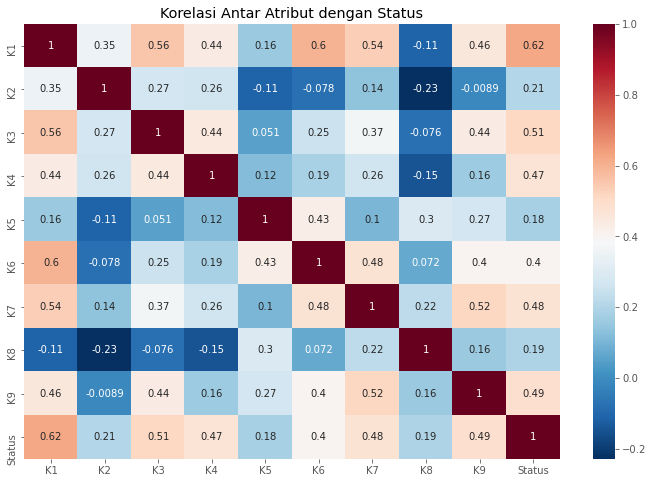

In [153]:
#Korelasi Antar Atribut
corrMatrix = data_status.corr(method='pearson')
corrMatrix2 = data_status.corr(method='spearman')
corrMatrix3 = data_status.corr(method='kendall')
#corrMatrix = data_seleksi.corr()


plt.figure(figsize=(12,8))
sns.heatmap(corrMatrix, cmap="RdBu_r",annot=True)

plt.title('Korelasi Antar Atribut dengan Status')
plt.show()

In [154]:
data_korelasi=data_status[['K1','K3','K4','K6','K7','K9']]
data_korelasi

,K1,K3,K4,K6,K7,K9
0,2.7,6.8,20.250,8.1,3.0,2.7
1,2.7,7.2,18.900,8.1,2.4,2.4
2,2.4,6.8,18.900,8.1,2.7,2.4
3,2.7,7.2,20.250,8.1,2.7,3.0
4,2.7,7.2,22.275,7.2,2.7,2.4
...,...,...,...,...,...,...
91,1.8,5.6,14.850,6.3,1.8,2.1
92,2.4,4.0,16.875,8.1,2.4,2.4
93,2.4,6.0,13.500,7.2,2.4,2.1
94,2.1,6.0,13.500,7.2,2.4,2.4


In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating dummies for gender
#data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

# the independent variables set
X_status = data_korelasi

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_status.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_status.values, i)
						for i in range(len(X_status.columns))]

#calculating VIF for each feature
#vif_data["VIF"] = [variance_inflation_factor(data_status.values, i)
#						for i in range(len(data_status.columns))]

print(vif_data)


  feature         VIF
0      K1  111.493330
1      K3  110.985038
2      K4   62.301162
3      K6  129.076699
4      K7  151.592959
5      K9  142.039475


# Feature Selection Menggunakan Chi Square

In [156]:
# Memisahkan antara kolom fitur dan kolom target.
data_status_feature = data_status.drop('Status',1)
sr_status = data_status['Status']

data_status_feature.head()

,K1,K2,K3,K4,K5,K6,K7,K8,K9
0,2.7,17.40,6.8,20.250,7.2,8.1,3.0,8.10,2.7
1,2.7,17.40,7.2,18.900,7.2,8.1,2.4,7.20,2.4
2,2.4,17.40,6.8,18.900,7.2,8.1,2.7,7.65,2.4
3,2.7,20.88,7.2,20.250,8.1,8.1,2.7,7.65,3.0
4,2.7,18.56,7.2,22.275,7.2,7.2,2.7,8.10,2.4


In [157]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2, k=4) 
chi2_selector.fit(data_status_feature, sr_status)

cols = chi2_selector.get_support(indices=True)
data_selected_features = data_status_feature.iloc[:,cols]

data_selected_features.head()

,K1,K2,K3,K4
0,2.7,17.40,6.8,20.250
1,2.7,17.40,7.2,18.900
2,2.4,17.40,6.8,18.900
3,2.7,20.88,7.2,20.250
4,2.7,18.56,7.2,22.275


# Wrapper Feature Selection

Wrapper feature selection yang digunakan pada bagian ini adalah Recursive Feature Elimination atau RFE. Pada scikit-learn, RFE ada dalam modul sklearn.feature_selection. Dalam wrapper feature selection harus mendefinisikan terlebih dahulu algoritma yang akan digunakan. Kali ini menggunakan random forest sebagai algoritma klasifikasi. Kemudian implementasikan RFE dengan random forest untuk mencari 4 fitur terpenting, dengan menggunakan dataset yang digunakan sebelumnya.


In [158]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

rfe = RFE(model_rf)
fit = rfe.fit(data_status_feature, sr_status)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))

Num Features: 4
Selected Features: [ True False  True  True False False False False  True]


In [159]:
df_selected_features = data_status_feature.iloc[:,fit.support_]
df_selected_features.head()

,K1,K3,K4,K9
0,2.7,6.8,20.250,2.7
1,2.7,7.2,18.900,2.4
2,2.4,6.8,18.900,2.4
3,2.7,7.2,20.250,3.0
4,2.7,7.2,22.275,2.4


# Embedded Feature Selection

Algoritma yang menggunakan konsep tree seperti random forest sebenarnya memiliki mekanisme untuk menentukan seberapa penting sebuah fitur. Pada random forest, nilai-nilai ini tersimpan dalam atribut feature_importances_

In [160]:
model_rf = RandomForestClassifier()
model_rf.fit(data_status_feature, sr_status)
model_rf.feature_importances_

array([0.25922905, 0.08951772, 0.172277  , 0.14165259, 0.02082614,
       0.0549767 , 0.05068607, 0.08759854, 0.12323617])

Untuk algoritma klasifikasi linier seperti Linear SVM dan Logistic Regression, kita dapat menggunakan regularisasi L1 sebagai fungsi penalti untuk mengeliminasi fitur.

In [161]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

model_lsvc = LinearSVC(C=0.01, penalty="l2", dual=False)
model_lsvc.fit(data_status_feature, sr_status)
sel_feature = SelectFromModel(model_lsvc, prefit=True)

df_selected_features = data_status_feature.iloc[:,sel_feature.get_support()]
df_selected_features.head()

,K1,K3,K4
0,2.7,6.8,20.250
1,2.7,7.2,18.900
2,2.4,6.8,18.900
3,2.7,7.2,20.250
4,2.7,7.2,22.275


In [162]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

model_clf = LogisticRegression(C=0.01, penalty="l2", dual=False)
#model_clf = LogisticRegression()
model_clf.fit(data_status_feature, sr_status)
sel_feature = SelectFromModel(model_clf, prefit=True)

df_selected_features = data_status_feature.iloc[:,sel_feature.get_support()]
df_selected_features.head()

,K2,K3,K4,K6
0,17.40,6.8,20.250,8.1
1,17.40,7.2,18.900,8.1
2,17.40,6.8,18.900,8.1
3,20.88,7.2,20.250,8.1
4,18.56,7.2,22.275,7.2


# Train Test Split

In [163]:
x = data_status.loc[:, ['K3', 'K4']]
#x = X_status
y = data_status.loc[:, 'Status']

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
#x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=5, stratify=y)

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [164]:
'''
from sklearn.preprocessing import normalize

# Normalisasi data
norm = normalize(x)

# Transformasi array menjadi dataframe 
x_norm = pd.DataFrame(data=norm, columns=x.columns)
x_norm.head()
'''

'\nfrom sklearn.preprocessing import normalize\n\n# Normalisasi data\nnorm = normalize(x)\n\n# Transformasi array menjadi dataframe \nx_norm = pd.DataFrame(data=norm, columns=x.columns)\nx_norm.head()\n'

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [166]:
y_train

43    1
62    1
3     1
86    0
45    1
     ..
92    0
67    1
64    1
47    1
44    1
Name: Status, Length: 76, dtype: int64

In [167]:
x_train

,K3,K4
43,6.4,20.250
62,5.6,22.950
3,7.2,20.250
86,5.2,16.200
45,6.4,20.250
...,...,...
92,4.0,16.875
67,5.6,16.200
64,5.6,23.625
47,7.2,26.325


In [168]:
import sklearn
from sklearn import datasets
from sklearn import tree

clf = LogisticRegression()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv=2)
scores

array([0.86842105, 0.92105263])

# Pengujian Imbalanced Data

Membuat fungsi untuk mengukur Imbalanced Data Status

In [169]:
def plot_scatter(df_x: pd.DataFrame, s_y: pd.Series, title: str, ax=None):

    # Plot scatter
    ax = sns.scatterplot(x=df_x.K3, y=df_x.K4, hue=s_y, ax=ax)

    # Default X and Y bounds, set title
    #ax.set_xbound(0, 1)
    #ax.set_ybound(0, 1)
    ax.set_title(title)


def plot_count(s_y: pd.Series, title: str, ax=None):

    # Plot counts
    ax = sns.countplot(x=s_y, ax=ax)

    # Label each bar
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0].mean()
        y=p.get_bbox().get_points()[1,1]
        ax.annotate(f'{y:.0f}', (x,y+5), ha='center', va='bottom', color=p.get_facecolor())

    # Default y bounds and title
    ax.set_ybound(0, 100)
    ax.set_title(title)


def plot_scatter_and_count(df_x: pd.DataFrame, s_y: pd.Series, title: str):

    # Calc fig size
    x_fig, y_fig = plt.rcParamsDefault['figure.figsize']
    new_fig_size = (x_fig*2, y_fig)
    
    # Create matplotlib objects and bind scatter and count plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=new_fig_size)
    fig.suptitle(title)
    scatter = plot_scatter(df_x, s_y, 'Scatter by K3 and K4', axes[0])
    count = plot_count(s_y, 'Count of Labels', axes[1])
    for ax in axes:
        ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.show()

In [170]:
def plot_bounds(x: pd.DataFrame, y: pd.Series, x_orig: pd.DataFrame, y_orig: pd.Series, title: str):

    # Fit logistic regression classifier for boundaries
    clf = LogisticRegression()
    clf.fit(x.loc[:, ['K3', 'K4']], y)

    # Meshgrid for every possible combination given some spacing
    K3_min, K3_max = x_orig.K3.min(), x_orig.K3.max()
    K4_min, K4_max = x_orig.K4.min(), x_orig.K4.max()
    xx, yy = np.meshgrid(np.arange(K3_min, K3_max, 0.5), np.arange(K4_min, K4_max, 1.0))
    df_mesh = pd.DataFrame({'K3': xx.ravel(), 'K4': yy.ravel()})

    # Predictions for each mesh x/y pair
    z = clf.predict(df_mesh)

    # Plot contours - x/y pairs, predictions, default colors
    plt.contourf(xx, yy, z.reshape(xx.shape), cmap=ListedColormap(['lightsteelblue', 'blanchedalmond']))
    #plt.contourf(xx, yy, z.reshape(xx.shape))

    # Plot scatter of data on top of contour
    ax = sns.scatterplot(x=x_orig.K3, y=x_orig.K4, hue=y_orig)
    ax.set_xbound(K3_min, K3_max)
    ax.set_ybound(K4_min, K4_max)
    ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    # Calculate predictions and various classification scores
    pred = clf.predict(x_orig.loc[:, ['K3', 'K4']])
    acc = accuracy_score(y_orig, pred)
    prec = precision_score(y_orig, pred)
    recall = recall_score(y_orig, pred)
    f1 = f1_score(y_orig, pred)

    # Title
    ax.set_title('Decision Bounds - ' + title + f'\nAccuracy: {acc:.2%}\nPrecision: {prec:.2%}\nRecall: {recall:.2%}\nF1 Score: {f1:.2%}')

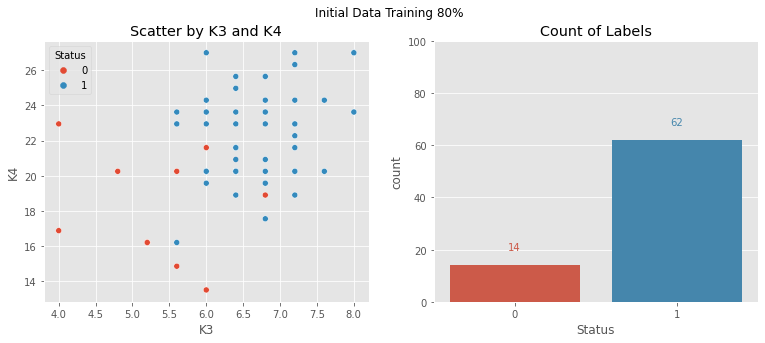

In [171]:
plot_scatter_and_count(x_train, y_train, 'Initial Data Training 80%')

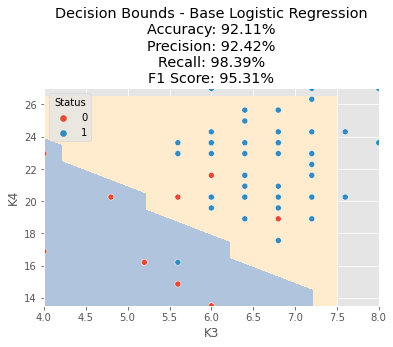

In [172]:
plot_bounds(x_train, y_train, x_train, y_train, 'Base Logistic Regression')

In [173]:
clf.fit(x_train, y_train)

LogisticRegression()

In [174]:
y_pred2 = clf.predict(x_test)

In [175]:
clf.coef_

array([[1.52813651, 0.4926619 ]])

In [176]:
clf.intercept_

array([-17.84307511])

# Cross Validation

In [177]:
from sklearn.model_selection import cross_val_predict

score= cross_val_score(clf, x_train, y_train, cv=14, scoring='accuracy') 
print(score)        
print(score.mean())

[1.         0.83333333 0.83333333 0.83333333 1.         1.
 0.8        1.         0.8        1.         1.         1.
 0.8        0.8       ]
0.9071428571428573


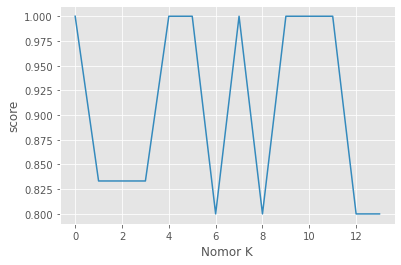

In [178]:
plt.plot(0, 1, score)
plt.xlabel('Nomor K')
plt.ylabel('score')
plt.show()

# SMOTE (Over Sampling)

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [179]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [180]:
x_train_smote

,K3,K4
0,6.400000,20.250000
1,5.600000,22.950000
2,7.200000,20.250000
3,5.200000,16.200000
4,6.400000,20.250000
...,...,...
119,6.250556,19.270874
120,6.624497,19.492321
121,5.200000,16.200000
122,6.788685,18.957283


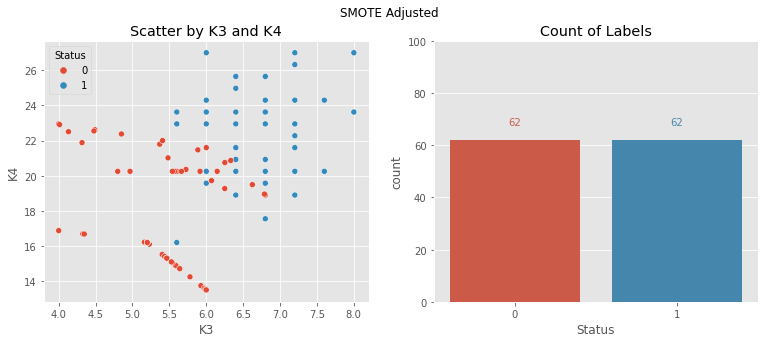

In [181]:
plot_scatter_and_count(x_train_smote, y_train_smote, 'SMOTE Adjusted')

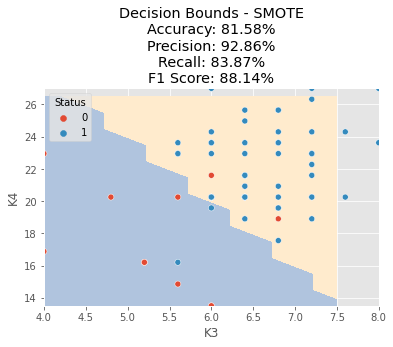

In [182]:
plot_bounds(x_train_smote, y_train_smote, x_train, y_train, 'SMOTE')

In [183]:
from sklearn.linear_model import LinearRegression
clf_smote = LinearRegression().fit(x_train_smote, y_train_smote)
clf_smote.coef_

array([0.28346097, 0.05728958])

In [184]:
clf_smote.intercept_

-2.3636340812701997

In [185]:
score_smote= cross_val_score(clf, x_train_smote, y_train_smote, cv=14, scoring='accuracy') 
print(score_smote)        
print(score_smote.mean())

[0.77777778 0.88888889 0.88888889 0.77777778 0.77777778 0.66666667
 1.         1.         1.         1.         0.88888889 0.66666667
 0.875      0.5       ]
0.8363095238095238


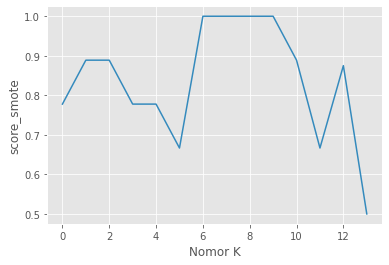

In [186]:
plt.plot(0, 1, score_smote)
plt.xlabel('Nomor K')
plt.ylabel('score_smote')
plt.show()

# Edited Nearest Neighbours (Under Sampling)

In [187]:
enn = EditedNearestNeighbours()
x_train_enn, y_train_enn = enn.fit_resample(x_train, y_train)

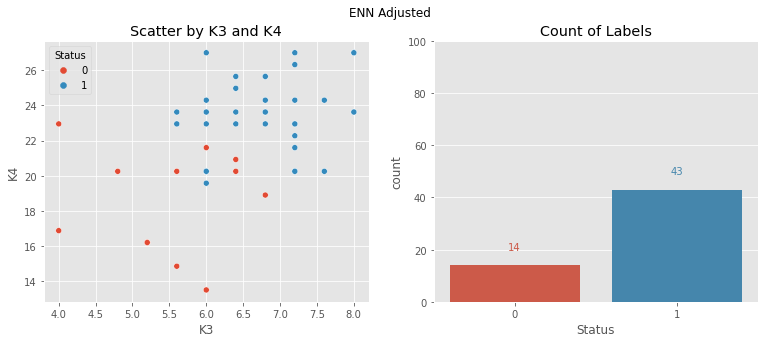

In [188]:
plot_scatter_and_count(x_train_enn, y_train_enn, 'ENN Adjusted')

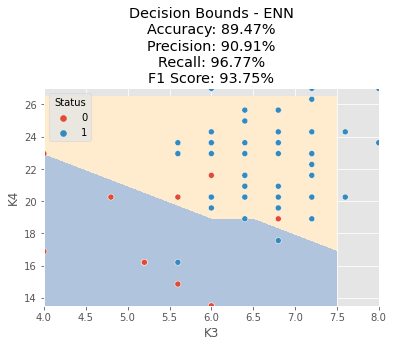

In [189]:
plot_bounds(x_train_enn, y_train_enn, x_train, y_train, 'ENN')

In [190]:
score_enn= cross_val_score(clf, x_train_enn, y_train_enn, cv=14, scoring='accuracy') 
print(score_enn)        
print(score_enn.mean())

[1.   0.75 0.75 0.75 1.   0.75 0.75 1.   0.75 1.   1.   1.   0.75 1.  ]
0.875


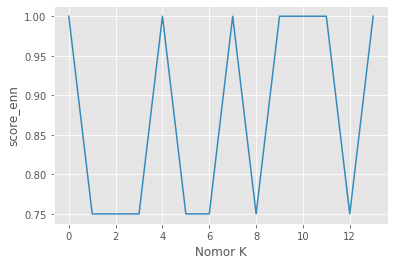

In [191]:
plt.plot(0, 1, score_enn)
plt.xlabel('Nomor K')
plt.ylabel('score_enn')
plt.show()

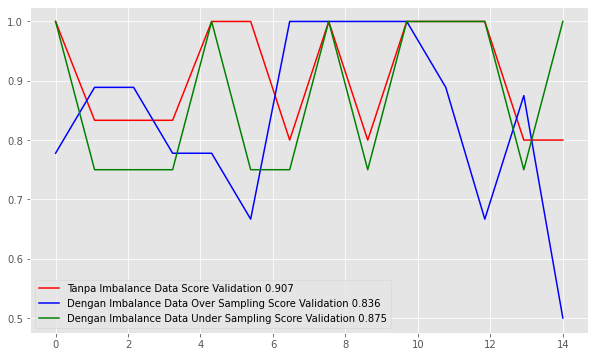

In [192]:
plt.style.use('ggplot')

X = np.linspace(0, 14, 14)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(X, score, color='red', label='Tanpa Imbalance Data Score Validation 0.907')
ax.plot(X, score_smote, color='blue', label='Dengan Imbalance Data Over Sampling Score Validation 0.836')
ax.plot(X, score_enn, color='green', label='Dengan Imbalance Data Under Sampling Score Validation 0.875')

plt.legend()

plt.show()

<hr>

Referensi @ <a href="https://ilmudatapy.com/">ilmudatapy.com</a>